## Image Classification with Convolutional Neural Network (CNN) on Fruits-360 Dataset

Outline of the project:

* [Introduction](#1)
* [Packages & Libraries](#2)
* [Looking at Data](#3)
* [CNN Model](#4)
* [Data Generation and Model Fit](#5)
* [Save and Load Model](#6)
* [Evaluation](#7)

<a id = "1"></a>
### Introduction
<img src="https://www.researchgate.net/publication/358255344/figure/fig4/AS:1118672802320404@1643723788128/Sample-of-the-Fruit-360-dataset.jpg">

Source: [https://www.researchgate.net/figure/Sample-of-the-Fruit-360-dataset_fig4_358255344]

Image Classification is a fundamental task that attempts to comprehend an entire image as a whole. The goal is to classify the image by assigning it to a specific label. Typically, Image Classification refers to images in which only one object appears and is analyzed. In contrast, object detection involves both classification and localization tasks, and is used to analyze more realistic cases in which multiple objects may exist in an image.


<a id = "2"></a>
### Packages & Libraries

In [1]:
import matplotlib.pyplot as plt
from glob import glob

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

<a id = "3"></a>
### Exploring Data

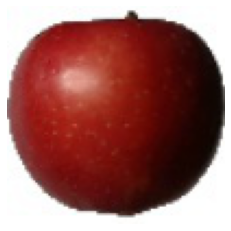

In [2]:
train_path = "../input/fruits/fruits-360_dataset/fruits-360/Training/"
test_path = "../input/fruits/fruits-360_dataset/fruits-360/Test/"

# a sample apple braeburn image
img = load_img(train_path + "Apple Braeburn/100_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [3]:
# image matrix shape with rgb
x = img_to_array(img)
x.shape

(100, 100, 3)

In [4]:
# how many classes are there in dataset?
classNames = glob(train_path + "/*")
numberOfClass = len(classNames)
print("The number of class:", numberOfClass)

The number of class: 131


<a id = "4"></a>
### CNN Model

In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output layer
model.add(Activation("softmax"))

2022-11-14 10:11:35.926128: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 10:11:36.022408: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 10:11:36.023299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 10:11:36.024689: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [7]:
batch_size = 32

<a id = "5"></a>
### Data Generation and Model Fit

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [9]:
history = model.fit_generator(generator = train_generator, 
                    steps_per_epoch = 1600 // batch_size, 
                    epochs = 100, 
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-14 10:11:52.694475: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-14 10:11:54.522731: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 23s 316ms/step - loss: 4.6952 - accuracy: 0.0269 - val_loss: 4.0567 - val_accuracy: 0.0662
Epoch 2/100
50/50 [==============================] - 14s 290ms/step - loss: 3.7947 - accuracy: 0.1069 - val_loss: 3.4731 - val_accuracy: 0.1163
Epoch 3/100
50/50 [==============================] - 14s 288ms/step - loss: 3.0769 - accuracy: 0.1912 - val_loss: 2.6087 - val_accuracy: 0.2675
Epoch 4/100
50/50 [==============================] - 14s 271ms/step - loss: 2.5393 - accuracy: 0.2869 - val_loss: 1.7753 - val_accuracy: 0.5075
Epoch 5/100
50/50 [==============================] - 14s 279ms/step - loss: 2.1322 - accuracy: 0.3694 - val_loss: 1.3811 - val_accuracy: 0.6375
Epoch 6/100
50/50 [==============================] - 14s 276ms/step - loss: 1.7849 - accuracy: 0.4819 - val_loss: 1.2512 - val_accuracy: 0.6413
Epoch 7/100
50/50 [==============================] - 13s 269ms/step - loss: 1.4637 - accuracy: 0.5544 - val_loss: 1.2106 - val_accuracy: 0.6425
Epoc

<a id = "6"></a>
### Save Model

In [17]:
def save_model(fileName):
    model.save_weights(fileName + ".h5")
    
    import json
    with open(fileName + ".json","w") as f:
        json.dump(history.history, f)

def load_json(fileName):
    import codecs
    import json
    with codecs.open(fileName + ".json", "r", encoding = "utf-8") as f:
        h = json.loads(f.read())
        
    return h
        
# save_model("test")
# h = load_json("test")

<a id = "7"></a>
### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


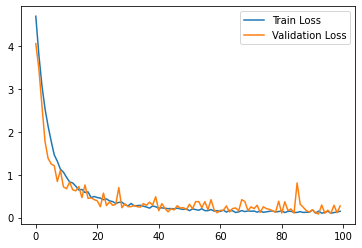

In [21]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

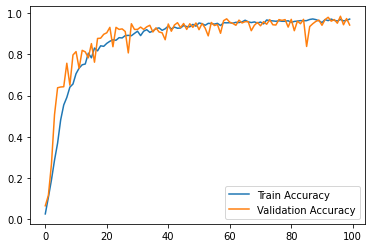

In [13]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

**Thanks for looking at the kernel. Please upvote the work if you like...**